In [1]:
%%javascript

Jupyter.keyboard_manager.command_shortcuts.add_shortcut('r', {
    help : 'run cell',
    help_index : 'zz',
    handler : function (event) {
        IPython.notebook.restart_run_all();
        return false;
    }}
);

<IPython.core.display.Javascript object>

In [2]:
import silq
silq.initialize("EWJN")
ATS_interface = interfaces['ATS']

qc.show_subprocess_widget()
%matplotlib nbagg

Initializing imports


<IPython.core.display.Javascript object>

Initializing functions
Initializing instruments
Initializing layout
Initializing data
Initializing analysis
Initializing parameters
Initializing plotting
Initialization complete


In [3]:
ATS_interface.default_acquisition_controller('Continuous')

In [4]:
marker1 = MarkerPulse(t_start=100, duration=100,
                      connection_requirements={'input_arg': 'ATS.chB'})
pulse_sequence = PulseSequence([marker1])
layout.target_pulse_sequence(pulse_sequence)
layout.setup()
interfaces['pulseblaster'].setup(final_instruction='loop')

In [5]:
pulseblaster.instructions()

[(0, 'continue', 0, 100000000),
 (4, 'continue', 0, 100000000),
 (0, 'branch', 0, 50)]

In [6]:
samples_per_trace = 2**16
samples_per_record = 2**8
print('Buffers: {}'.format(samples_per_trace / samples_per_record))
continuous_controller.update_acquisition_settings(channel_selection='B',
                                                  samples_per_record=samples_per_record,
                                                  allocated_buffers=100)
continuous_controller.samples_per_trace(samples_per_trace)
continuous_controller.traces_per_acquisition(1)
continuous_controller.setup()
ATS.config()

Buffers: 256.0


In [9]:
ATS.get_parameter('GET_ASYNC_BUFFERS_PENDING_FULL', dtype=np.bool, dtype_val=True)

RuntimeError: *** error on Alazar_server ***
while executing query: ('ASK', 'cmd', (0, 'get_parameter', 'GET_ASYNC_BUFFERS_PENDING_FULL'), {'dtype_val': True, 'dtype': <class 'bool'>})

(<bound method InstrumentServer.handle_cmd of <qcodes.instrument.server.InstrumentServer object at 0x0000000006518780>>, (0, 'get_parameter', 'GET_ASYNC_BUFFERS_PENDING_FULL'), {'dtype': <class 'bool'>, 'dtype_val': True})
Traceback (most recent call last):
  File "c:\users\lab.blug12meas\documents\silq\qcodes\qcodes\process\server.py", line 347, in _process_ask
    response = func(*args, **kwargs)
  File "c:\users\lab.blug12meas\documents\silq\qcodes\qcodes\instrument\server.py", line 190, in handle_cmd
    return func(*args, **kwargs)
  File "c:\users\lab.blug12meas\documents\silq\qcodes\qcodes\instrument_drivers\AlazarTech\ATS.py", line 694, in get_parameter
    self._parameters[parameter], value.ctypes.data)
  File "c:\users\lab.blug12meas\documents\silq\qcodes\qcodes\instrument_drivers\AlazarTech\ATS.py", line 755, in _call_dll
    argrepr))
RuntimeError: error 533: ApiUnsupportedFunction from function AlazarGetParameterUL with args: [1224, 0, 268435537, 86181024]


In [7]:
layout.start()
result = continuous_controller.acquisition()
layout.stop()

plt.figure()
plt.plot(result[0])

RuntimeError: *** error on Alazar_server ***
while executing query: ('ASK', 'cmd', (2, 'get', 'acquisition'), {})

(<bound method InstrumentServer.handle_cmd of <qcodes.instrument.server.InstrumentServer object at 0x000000000650C2E8>>, (2, 'get', 'acquisition'), {})
Traceback (most recent call last):
  File "c:\users\lab.blug12meas\documents\silq\qcodes\qcodes\process\server.py", line 347, in _process_ask
    response = func(*args, **kwargs)
  File "c:\users\lab.blug12meas\documents\silq\qcodes\qcodes\instrument\server.py", line 190, in handle_cmd
    return func(*args, **kwargs)
  File "c:\users\lab.blug12meas\documents\silq\qcodes\qcodes\instrument\base.py", line 555, in get
    return self.parameters[param_name].get()
  File "c:\users\lab.blug12meas\documents\silq\qcodes\qcodes\instrument\parameter.py", line 566, in get
    raise e
  File "c:\users\lab.blug12meas\documents\silq\qcodes\qcodes\instrument\parameter.py", line 560, in get
    value = self._get()
  File "c:\users\lab.blug12meas\documents\silq\qcodes\qcodes\utils\command.py", line 176, in __call__
    return self.exec_function(*args)
  File "c:\users\lab.blug12meas\documents\silq\qcodes\qcodes\instrument_drivers\AlazarTech\ATS.py", line 1088, in do_acquisition
    **self._acquisition_settings)
  File "c:\users\lab.blug12meas\documents\silq\qcodes\qcodes\instrument_drivers\AlazarTech\ATS.py", line 644, in acquire
    self.get_parameter('GET_ASYNC_BUFFERS_PENDING_FULL')))
  File "c:\users\lab.blug12meas\documents\silq\qcodes\qcodes\instrument_drivers\AlazarTech\ATS.py", line 694, in get_parameter
    self._parameters[parameter], value.ctypes.data)
  File "c:\users\lab.blug12meas\documents\silq\qcodes\qcodes\instrument_drivers\AlazarTech\ATS.py", line 755, in _call_dll
    argrepr))
RuntimeError: ('error 533: ApiUnsupportedFunction from function AlazarGetParameterUL with args: [1216, 0, 268435537, 173126560]', 'getting continuous_controller:acquisition')


### Buffer time scan

In [95]:
repetitions = 5
samples_per_trace = 2**16
t_list = []
for k in range(4,12):
    samples_per_record = 2**k
    continuous_controller.update_acquisition_settings(channel_selection='B',
                                                      samples_per_record=samples_per_record,
                                                      allocated_buffers=100)
    continuous_controller.samples_per_trace(samples_per_trace)
    continuous_controller.traces_per_acquisition(1)
    continuous_controller.setup()
    ATS.config()
    
    t0 = time()
    for loop in range(repetitions):
        continuous_controller.acquisition()
    t_list.append((time() - t0) / repetitions)
    print('Buffers: {}\t time: {} s'.format(samples_per_trace / samples_per_record,
                                             time() - t0))

Buffers: 4096.0	 time: 261.84539699554443 s
Buffers: 2048.0	 time: 147.227618932724 s
Buffers: 1024.0	 time: 86.41274452209473 s
Buffers: 512.0	 time: 35.835073947906494 s
Buffers: 256.0	 time: 30.1450457572937 s
Buffers: 128.0	 time: 20.010148525238037 s
Buffers: 64.0	 time: 13.24507474899292 s
Buffers: 32.0	 time: 9.37606143951416 s


<IPython.core.display.Javascript object>


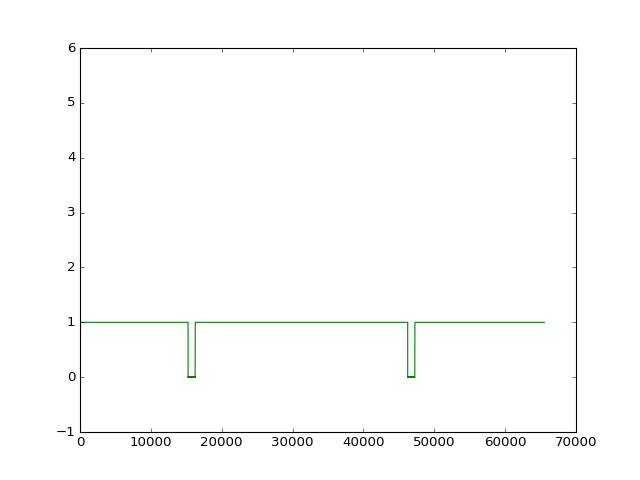

In [94]:
plt.figure()
plt.plot(t_list)

Wall time: 844 ms


<IPython.core.display.Javascript object>


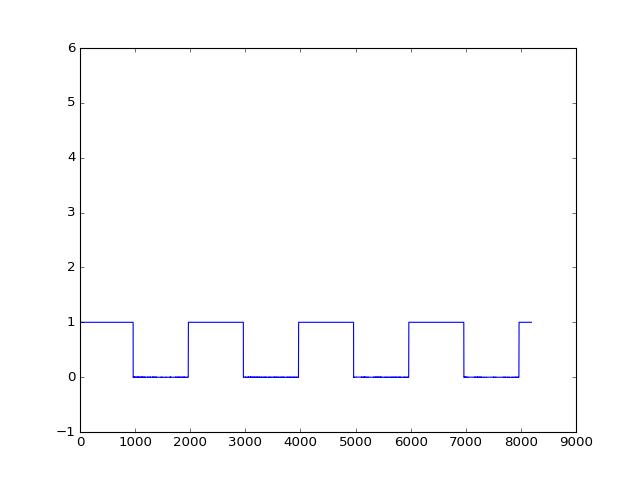

In [87]:
%time result = continuous_controller.acquisition()

plt.plot(result[0])

In [53]:
layout.stop()